In [1]:
import numpy as np

In [25]:
# generate 100 samples, with 10 classes, with the probability of each class is
# [0.8, 0.1, 0.03, 0.03, 0.02, 0.01, 0.005, 0.005, 0.005, 0.005]

# generate 100 samples
n = 500
# 10 classes
k = 10
# probability of each class is like long tail distribution
p = [0.8, 0.1, 0.03, 0.03, 0.01, 0.001, 0.005, 0.008, 0.008, 0.008]
print(np.sum(p))
# generate 100 samples, with 10 classes, with the probability of each class is
# [0.8, 0.1, 0.03, 0.03, 0.02, 0.01, 0.005, 0.005, 0.005, 0.005]
samples = np.random.choice(k, n, p=p)
print(samples)
print(np.bincount(samples))

1.0
[0 1 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 9 0 0 1 0 0 0 1 1 0 7 0 0 0
 0 9 1 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1
 0 0 0 1 0 0 0 0 0 0 8 0 0 0 8 0 0 9 0 0 1 0 0 0 0 0 0 9 0 0 0 7 0 0 0 0 0
 0 0 1 0 8 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 4 0 1 0 1 0 0 3 3 0 4 0 9 1 1 0
 0 0 0 0 0 1 0 0 1 2 0 1 0 0 2 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 0 1 8 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 1 3 0 0 0 0 0 0 0 3 1 0
 0 0 0 4 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 3 0 0 1 0 0 0 0 0 1 0 0 0 0 4 0 0 0 1 0 0 3 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 3 0 0 0 0 0 0 0 0 3 0 0 0 6 0 0 0 1 3 0 0 0 0 0 0 0 0 1 0
 0 9 0 0 0 0 3 4 1 0 0 7 0 0 0 0 0 0 0 7 0 0 0 4 0 0 0 2 0 0 0 0 0 0 8 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 5 0 0 0 0 0 0 0 0 0 0 0 2 0 7 1 0 0 0 0 0 0 1
 0 0 6 0 0 0 0 0 0 0 

In [32]:
mean = np.mean(samples)
std = np.std(samples)
mode = np.argmax(np.bincount(samples))
print("mean: ", mean, "std: ", std, "mode: ", mode)

mean:  0.586 std:  1.6681139049837095 mode:  0


In [30]:
th = mean + std
print("th: ", th)

th:  2.2541139049837096


In [34]:
data = samples
total_observations = len(data)
threshold_high = th


In [35]:
# Determine the proportion of data points above (high) and below (low) the threshold
high_values = data[data > threshold_high]
low_values = data[data <= threshold_high]

# Assign mass functions based on the proportion of high and low values
m_high_threshold = len(high_values) / total_observations
m_low_threshold = len(low_values) / total_observations

# Assuming no mass is given to complete uncertainty (as all data is accounted as either high or low)
m_uncertain_threshold = 0

# Compute belief and plausibility for "high" values
bel_high_threshold = m_high_threshold
pl_high_threshold = m_high_threshold + m_uncertain_threshold

# Compute belief and plausibility for "low" values
bel_low_threshold = m_low_threshold
pl_low_threshold = m_low_threshold + m_uncertain_threshold

print("bel_high_threshold: ", bel_high_threshold, "pl_high_threshold: ", pl_high_threshold)
print("bel_low_threshold: ", bel_low_threshold, "pl_low_threshold: ", pl_low_threshold)

bel_high_threshold:  0.084 pl_high_threshold:  0.084
bel_low_threshold:  0.916 pl_low_threshold:  0.916


In [36]:
# is mode in high or low?
if mode > th:
    print("mode is in high")
    isHigh = True
else:
    print("mode is in low")
    isHigh = False

mode is in low


In [38]:
uncertainty = std * np.sqrt(bel_high_threshold) if isHigh else std * np.sqrt(bel_low_threshold)
print("selection: ", mode, "uncertainty: ", uncertainty)

selection:  0 uncertainty:  1.5965166031081544


In [39]:
# give me 100 samples with mean = 100, std = 10
samples = np.random.normal(100, 10, 100)
print(samples)

[118.00565489  88.72293997  93.67593065  99.27377206 132.09701599
  96.53480325 111.16288893 104.55885837 108.72406066  94.34906658
  97.84671367 111.1484032  109.67714566  96.08964044  88.13409177
  97.19986885 109.51622361 110.51087053  98.50215828  92.04409775
  94.77087068 104.54731319  97.7263205  106.17087804 103.82063908
  83.85070385  88.57807582 100.6045026   94.22273571  96.16851209
  96.70749943 106.55337978 107.19885727  96.71984192 105.96431174
  79.90808575 101.88020336 119.22907922  92.26345792 110.64005636
 107.51110803 110.57706887 108.00295122  92.80767789  91.68215521
 100.16491781  97.52369438 112.3246324  104.99953783  88.90057398
  92.5102949  103.40491575  94.72908602  92.15892848 116.71521536
  91.9079125  109.81996293 105.75426777  99.63365369  94.30307254
  89.78658469 105.50720255 112.16847615  97.07938336  96.36521623
 110.45451224  88.52025218  91.36805045  89.29617438 110.01869353
  96.95193281 102.13155842  95.23712746  87.73802482 105.83377256
 115.45145

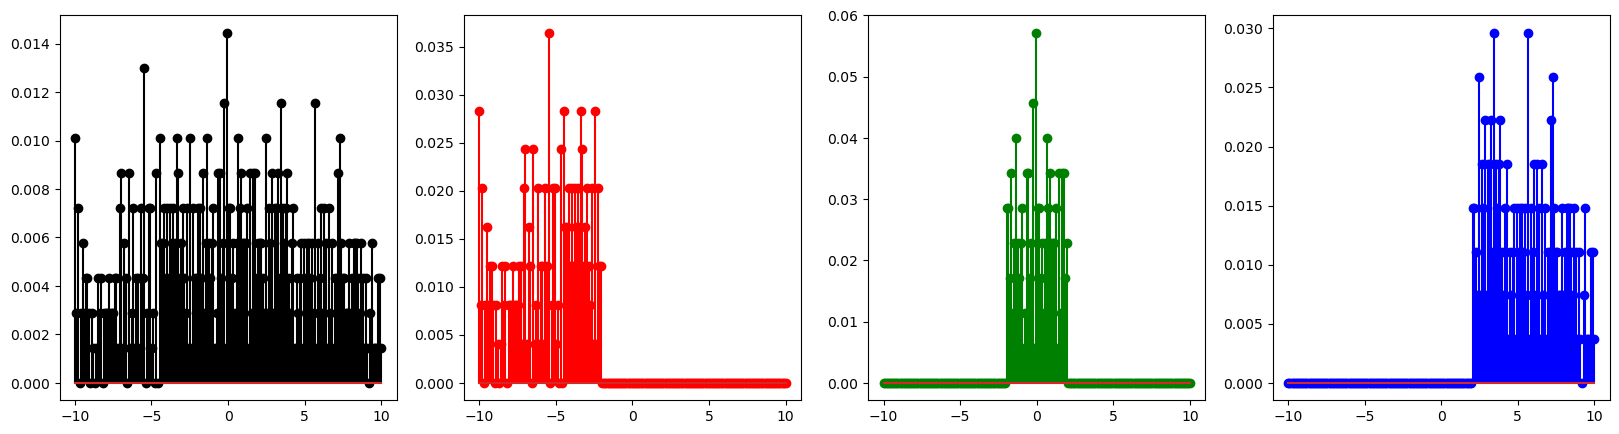

In [58]:
mu, std = 0, 10
s = np.random.normal(mu, std, 1000)
prior_1 = np.zeros((200))
prior_2 = np.zeros((200))
prior_3 = np.zeros((200))

# count < -2, -2 < count < 2, count > 2
mask_1 = s < -2
mask_3 = s > 2
mask_2 = np.logical_and(s >= -2, s <= 2)

hist_s, _ = np.histogram(s, bins=200, range=(-10, 10))
hist_1, _ = np.histogram(s[mask_1], bins=200, range=(-10, 10))
hist_2, _ = np.histogram(s[mask_2], bins=200, range=(-10, 10))
hist_3, _ = np.histogram(s[mask_3], bins=200, range=(-10, 10))

prior_s = hist_s / np.sum(hist_s)
prior_1 = hist_1 / np.sum(hist_1)
prior_2 = hist_2 / np.sum(hist_2)
prior_3 = hist_3 / np.sum(hist_3)

import matplotlib.pyplot as plt

# plot the stem plot for s, prior_1, prior_2, prior_3
plt.figure(figsize=(20, 5))
x_mesh = np.linspace(-10, 10, 200)
plt.subplot(1, 4, 1)
plt.stem(x_mesh, prior_s, 'k', markerfmt='ko', linefmt='k-')
plt.subplot(1, 4, 2)
plt.stem(x_mesh, prior_1, 'r', markerfmt='ro', linefmt='r-')
plt.subplot(1, 4, 3)
plt.stem(x_mesh, prior_2, 'g', markerfmt='go', linefmt='g-')
plt.subplot(1, 4, 4)
plt.stem(x_mesh, prior_3, 'b', markerfmt='bo', linefmt='b-')
plt.show()

In [63]:
import numpy as np

# Assuming 'img' is your 8x8 image array and 'weight_pixel_value' is your 256-element array of weights
# Example initialization (replace these with your actual data)
img = np.random.randint(0, 256, (8, 8), dtype=np.int16)
weight_pixel_value = np.random.rand(256)  # Example weights, one for each possible pixel value

# Obtain the weights for each pixel in the image
weights = weight_pixel_value[img]

# 'weights' is now an 8x8 array where each element corresponds to the weight of the pixel in 'img'
print(img, weights)


[[191 248 113 235 240 154  55 230]
 [239 154 128  93 243  52 145 249]
 [ 54 135  35   7  17 159 142  69]
 [169  25 145 175 207  15 253 181]
 [175   9  84  15 178 153  81 182]
 [157 134 248 119 152 186  99  10]
 [106 171 164 138  42 202  89  38]
 [234  80 169 202  26 254 191 118]] [[0.20062521 0.70896056 0.05257049 0.5538184  0.87132375 0.68558093
  0.46796438 0.12215994]
 [0.96490235 0.68558093 0.15369926 0.73394827 0.19007502 0.97612106
  0.83789535 0.46735758]
 [0.00357017 0.80559571 0.81734415 0.52564366 0.56053169 0.07310337
  0.43524156 0.90315746]
 [0.24930333 0.16284222 0.83789535 0.23457855 0.72159684 0.25247462
  0.4175736  0.20304002]
 [0.23457855 0.87116452 0.19839    0.25247462 0.55136156 0.53932721
  0.69920219 0.77811486]
 [0.67881402 0.50023483 0.70896056 0.99236195 0.5356736  0.63074189
  0.42195164 0.33149137]
 [0.88044825 0.85130022 0.59317496 0.34892883 0.7499929  0.69195218
  0.34568228 0.41943322]
 [0.48187549 0.79016687 0.24930333 0.69195218 0.73010944 0.10902132


In [64]:
print(weight_pixel_value[191])

0.20062520540501716
